In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [83]:
df = pd.read_csv('Driver_Behavior.csv')

In [84]:
df.head()

,speed_kmph,accel_x,accel_y,brake_pressure,steering_angle,throttle,lane_deviation,phone_usage,headway_distance,reaction_time,behavior_label
0,36.075011,0.535763,0.708633,23.107812,-3.169956,53.123505,0.851871,1,17.996005,1.400050,Distracted
1,38.090536,0.973764,0.044312,36.961137,-24.380082,36.383904,1.459495,1,29.904182,1.428537,Distracted
2,71.314445,3.638434,0.789375,79.734087,-6.100238,78.110507,0.254723,0,11.126012,0.406950,Aggressive
3,86.485997,2.441366,0.039135,45.007002,17.886191,82.794935,0.911664,0,11.064505,0.539964,Aggressive
4,52.816777,-0.201763,0.560619,38.759612,-4.104323,61.432375,1.591244,1,21.967570,1.369908,Distracted


In [85]:
df.tail()

,speed_kmph,accel_x,accel_y,brake_pressure,steering_angle,throttle,lane_deviation,phone_usage,headway_distance,reaction_time,behavior_label
29995,53.793871,0.630921,0.338402,26.264227,1.380436,32.252103,0.934973,1,27.011128,1.765279,Distracted
29996,47.963150,0.578964,0.073692,22.825827,9.846702,34.785630,0.255194,0,42.445077,0.710229,Safe
29997,49.804551,1.377664,0.546392,49.951452,7.958562,39.792856,0.524941,1,25.878929,1.449100,Distracted
29998,44.326306,0.421080,0.127109,0.738540,12.019311,29.867322,0.309540,0,41.039219,0.711371,Safe
29999,71.886043,1.040261,0.770302,49.599293,10.359212,79.936720,0.558958,0,19.026689,0.639718,Aggressive


In [86]:
df.shape

(30000, 11)

In [87]:
df.columns

Index(['speed_kmph', 'accel_x', 'accel_y', 'brake_pressure', 'steering_angle',
       'throttle', 'lane_deviation', 'phone_usage', 'headway_distance',
       'reaction_time', 'behavior_label'],
      dtype='object')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   speed_kmph        30000 non-null  float64
 1   accel_x           30000 non-null  float64
 2   accel_y           30000 non-null  float64
 3   brake_pressure    30000 non-null  float64
 4   steering_angle    30000 non-null  float64
 5   throttle          30000 non-null  float64
 6   lane_deviation    30000 non-null  float64
 7   phone_usage       30000 non-null  int64  
 8   headway_distance  30000 non-null  float64
 9   reaction_time     30000 non-null  float64
 10  behavior_label    30000 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 2.5+ MB


In [89]:
df.describe()

,speed_kmph,accel_x,accel_y,brake_pressure,steering_angle,throttle,lane_deviation,phone_usage,headway_distance,reaction_time
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,59.986424,1.265818,0.368501,40.767624,-0.040207,55.001223,0.568549,0.333333,23.399177,0.999817
std,14.806008,1.026624,0.295654,26.721728,11.384086,21.475323,0.420563,0.471412,11.998469,0.466180
min,20.000000,-0.949617,-0.479718,0.003128,-59.989984,20.001444,0.000001,0.000000,5.004359,0.400008
25%,49.568893,0.506529,0.116047,18.722464,-6.215165,37.246356,0.234971,0.000000,13.683875,0.625024
50%,57.901281,0.831602,0.313145,39.951206,-0.018734,50.066483,0.456616,0.000000,20.133699,0.851295
75%,69.242746,1.968167,0.568768,57.914900,6.158074,70.144059,0.810950,1.000000,31.308284,1.396176
max,118.439831,5.308924,1.664605,99.994365,53.426806,99.994762,2.425784,1.000000,49.998924,1.999885


In [90]:
df.describe(include='object')

,behavior_label
count,30000
unique,3
top,Distracted
freq,10000


In [91]:
df.isnull().sum()

speed_kmph          0
accel_x             0
accel_y             0
brake_pressure      0
steering_angle      0
throttle            0
lane_deviation      0
phone_usage         0
headway_distance    0
reaction_time       0
behavior_label      0
dtype: int64

In [92]:
df.isnull().sum().sum()

0

In [93]:
df.duplicated().sum()

0

In [94]:
num_cols = df.select_dtypes(include='number')

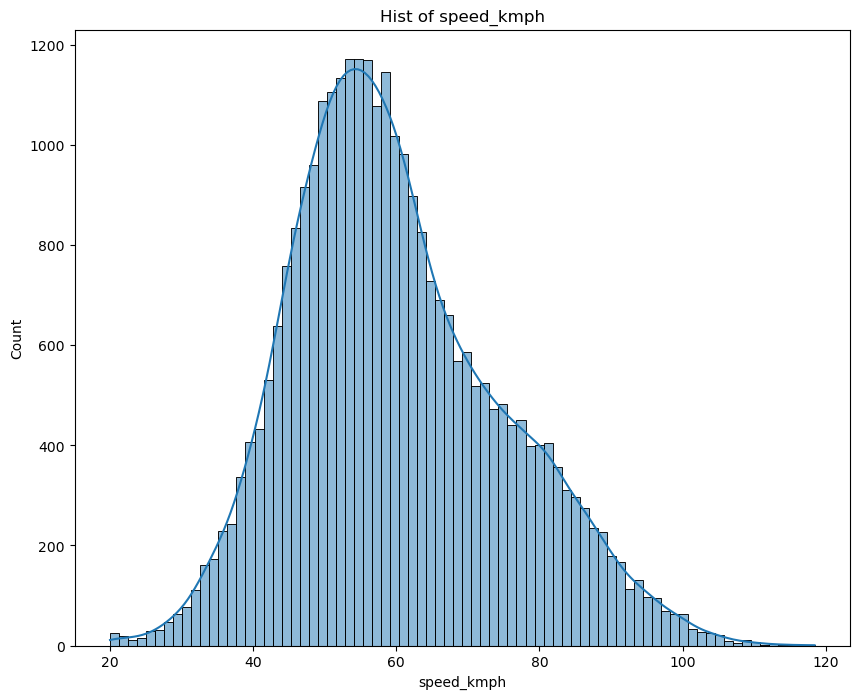

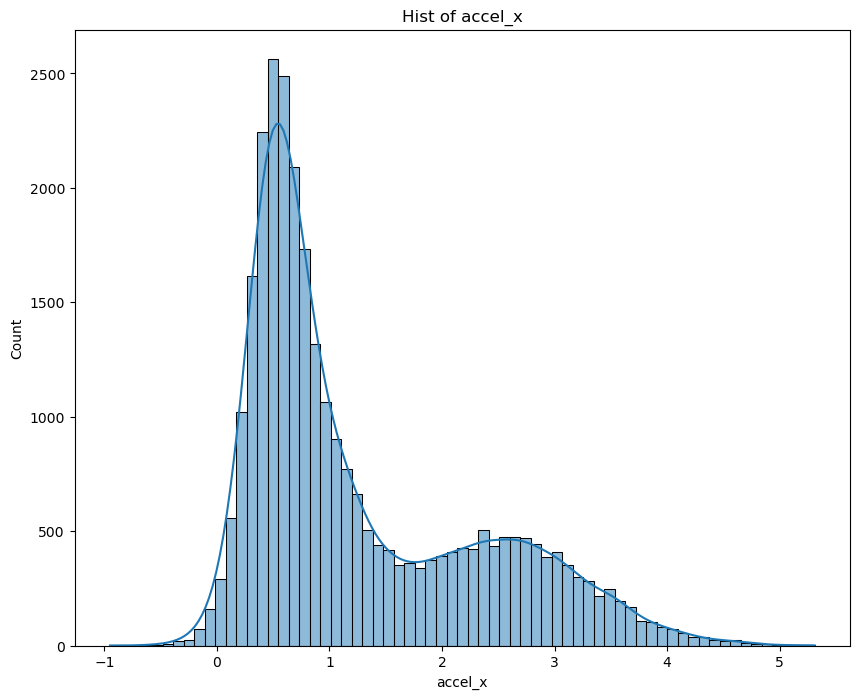

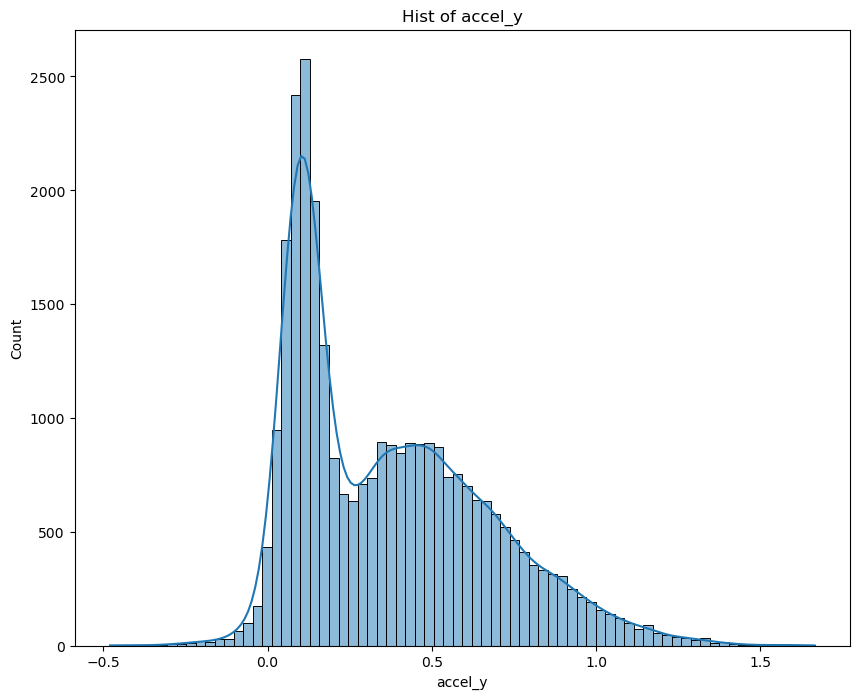

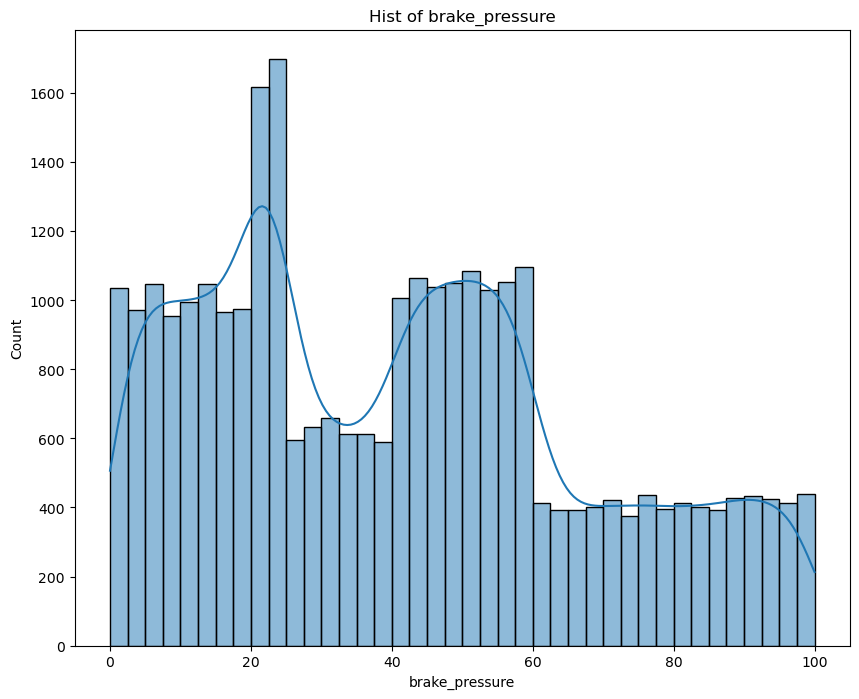

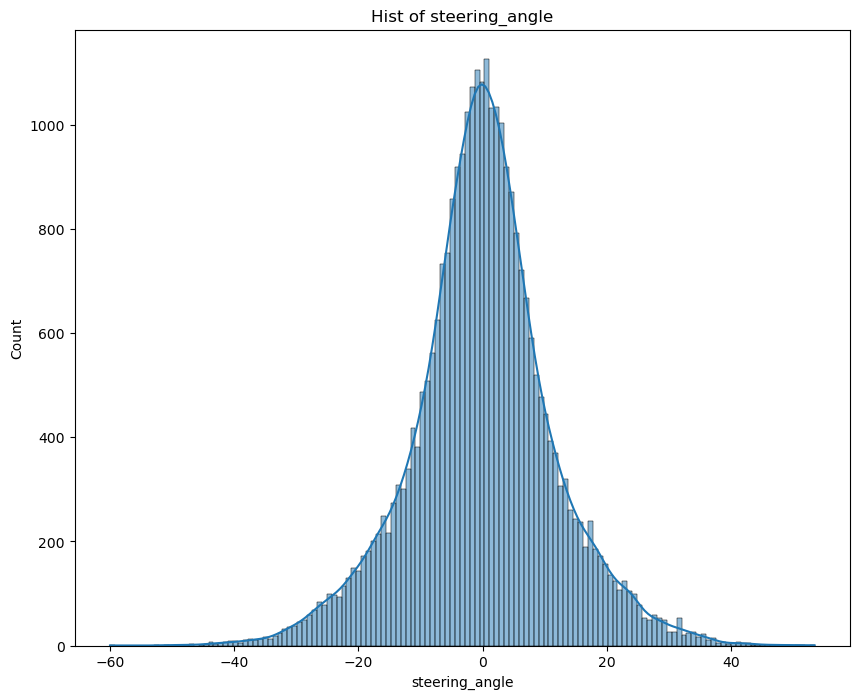

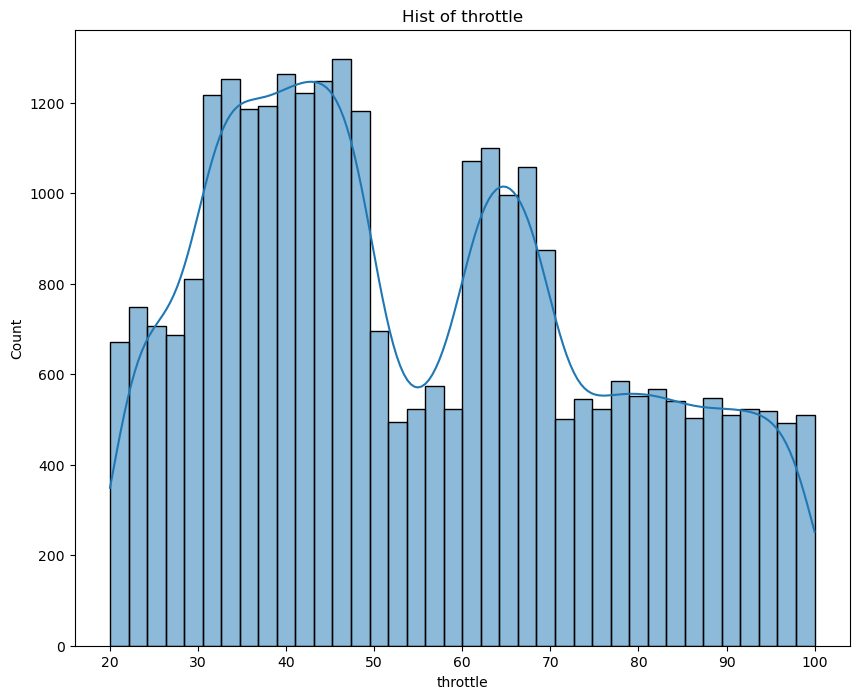

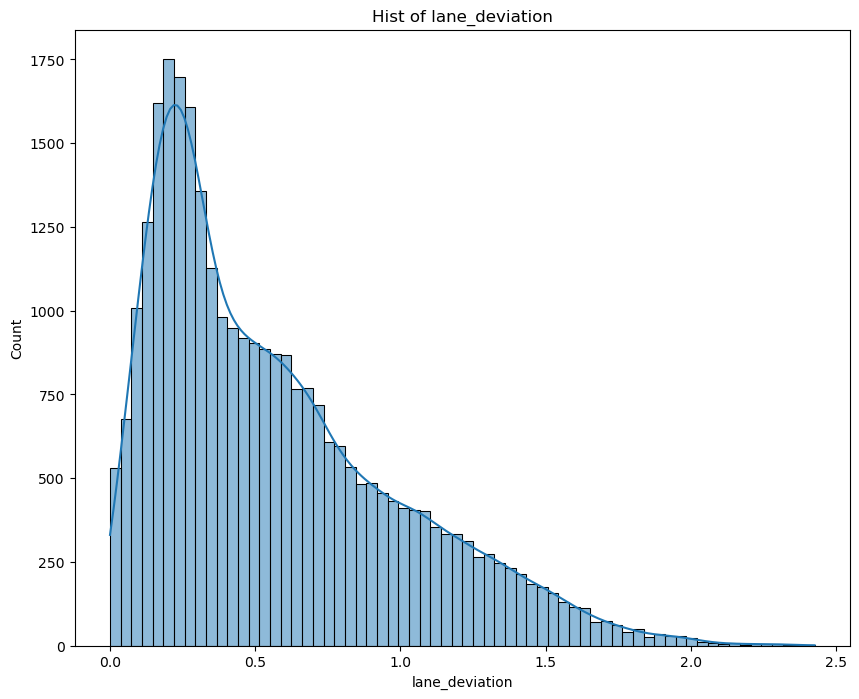

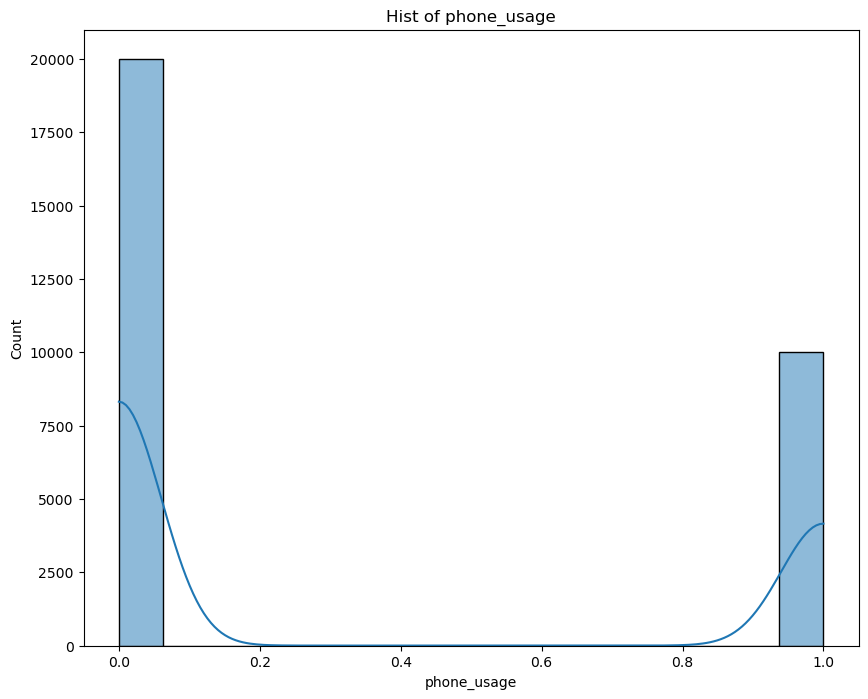

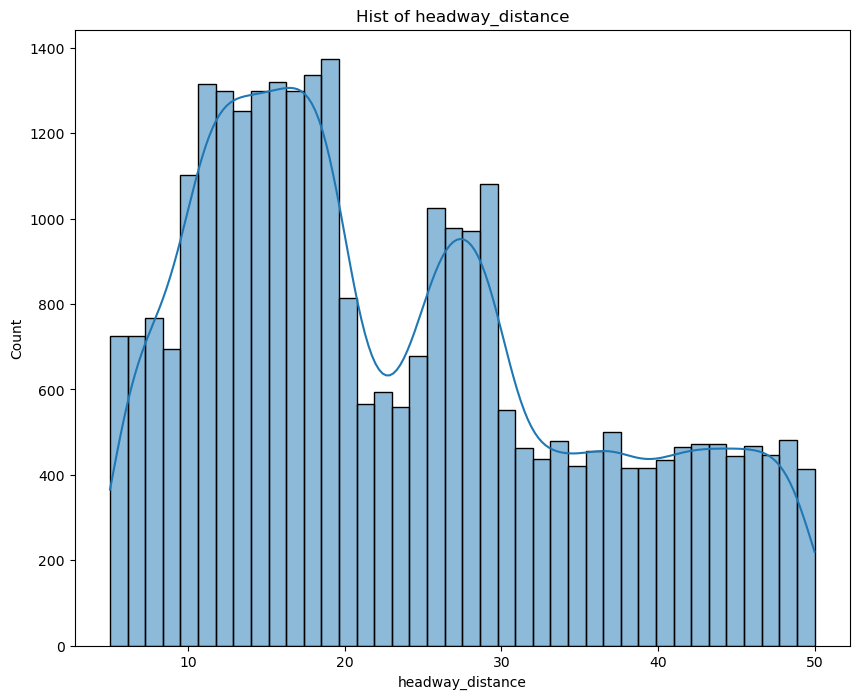

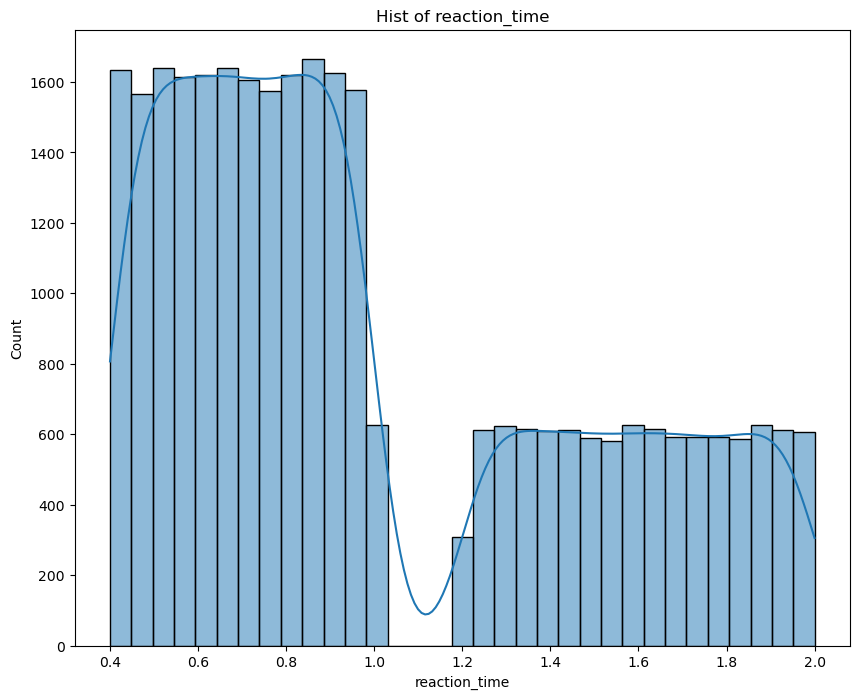

In [95]:
for i in num_cols:
    plt.figure(figsize=(10,8))
    sns.histplot(df[i],kde=True)
    plt.title(f'Hist of {i}')
    plt.show()

In [96]:
for i in num_cols:
    print(f"Skewness of {i}: ",df[i].skew())

Skewness of speed_kmph:  0.4900473122258121
Skewness of accel_x:  1.0297762179312138
Skewness of accel_y:  0.7735919149393229
Skewness of brake_pressure:  0.4181944163814291
Skewness of steering_angle:  -0.012558148969635719
Skewness of throttle:  0.36028043389437003
Skewness of lane_deviation:  0.9898121843395906
Skewness of phone_usage:  0.7071421387845692
Skewness of headway_distance:  0.5354911200112688
Skewness of reaction_time:  0.6711470679865847


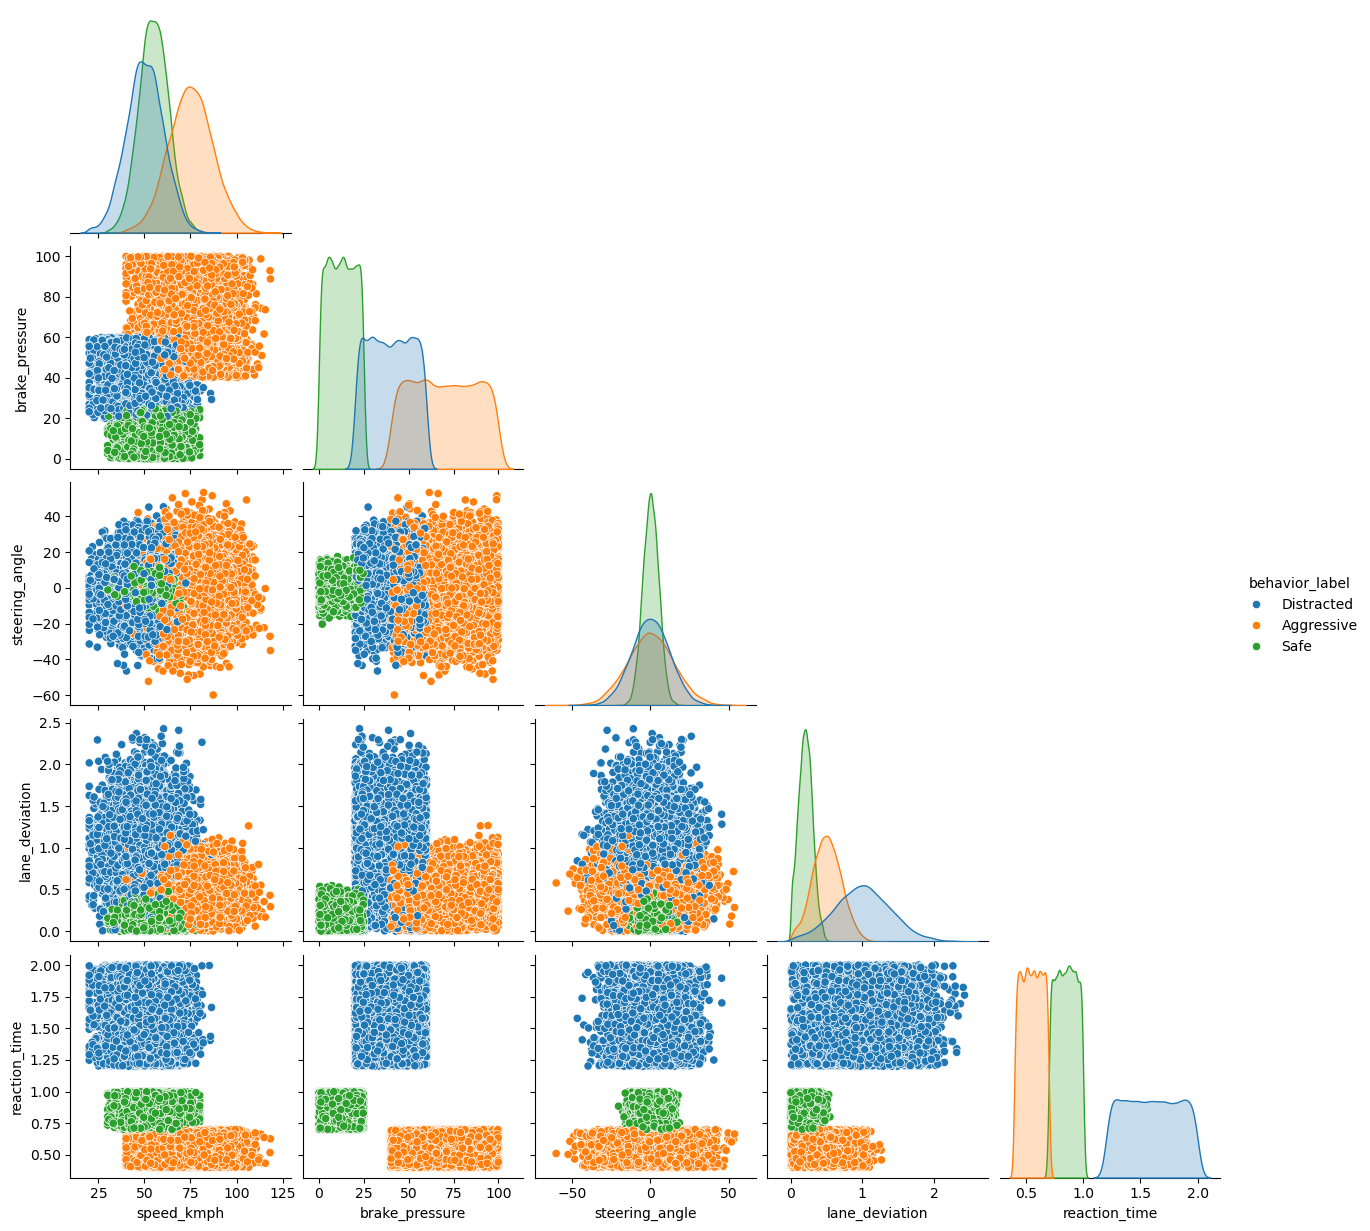

In [97]:
important_features = [
    "speed_kmph",
    "brake_pressure",
    "steering_angle",
    "lane_deviation",
    "reaction_time",
    "behavior_label"
]

sns.pairplot(
    df[important_features],
    hue="behavior_label",
    diag_kind="kde",
    corner=True
)

plt.show()

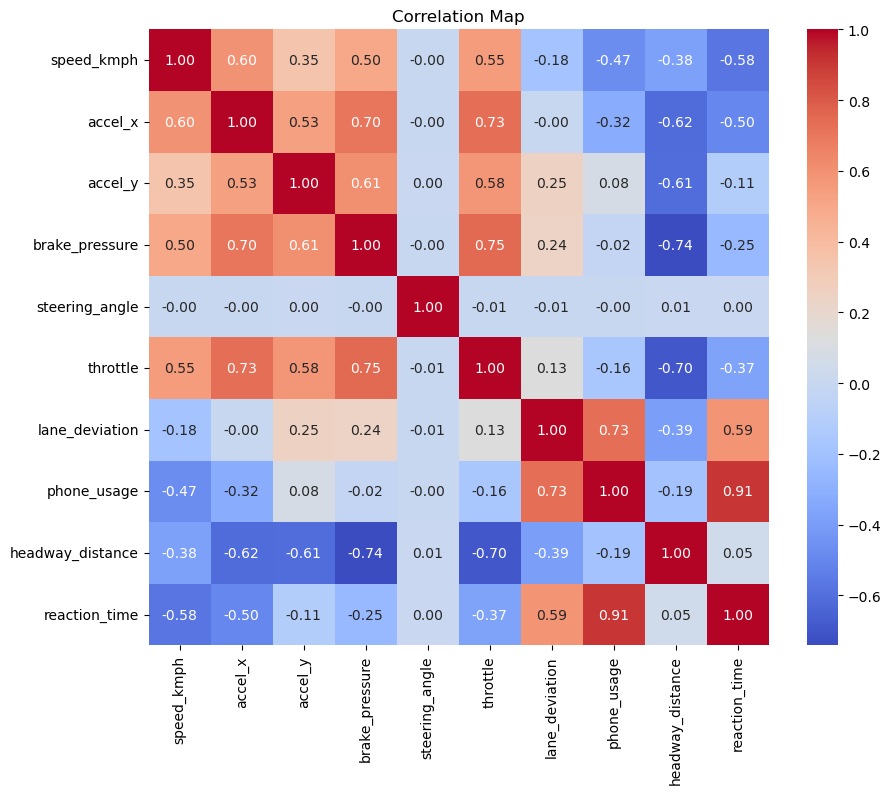

In [98]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.2f',cmap='coolwarm')
plt.title("Correlation Map")
plt.show()

In [99]:
df['behavior_label'].value_counts()

behavior_label
Distracted    10000
Aggressive    10000
Safe          10000
Name: count, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Distracted'), Text(1, 0, 'Aggressive'), Text(2, 0, 'Safe')])

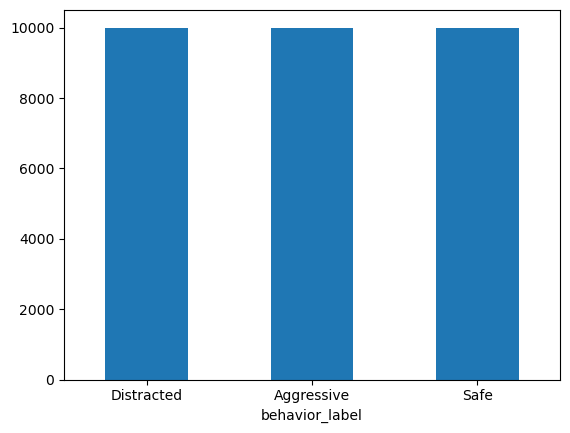

In [100]:
df['behavior_label'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

In [101]:
X = df.drop('behavior_label',axis=1)
y = df['behavior_label']

In [102]:
y.value_counts()

behavior_label
Distracted    10000
Aggressive    10000
Safe          10000
Name: count, dtype: int64

In [103]:
X_fixed = X.drop(['phone_usage', 'reaction_time'], axis=1)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(
    X_fixed, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [105]:
preprocessor = ColumnTransformer(
    transformers=[
        ('StandardScaler',StandardScaler(),X_fixed.columns)
    ]

)
preprocessor.set_output(transform='pandas')

ColumnTransformer(transformers=[('StandardScaler', StandardScaler(),
                                 Index(['speed_kmph', 'accel_x', 'accel_y', 'brake_pressure', 'steering_angle',
       'throttle', 'lane_deviation', 'headway_distance'],
      dtype='object'))])

In [106]:
models = {
    "Logistic Regression": (
        LogisticRegression(max_iter=2000),
        {"classifier__C": [0.01, 0.1, 1, 10]}
    ),

    "Decision Tree": (
        DecisionTreeClassifier(random_state=42),
        {"classifier__max_depth": [None, 5, 10, 20]}
    ),

    "Random Forest": (
        RandomForestClassifier(random_state=42),
        {
            "classifier__n_estimators": [100, 200],
            "classifier__max_depth": [None, 10, 20]
        }
    ),

    "Gradient Boosting": (
        GradientBoostingClassifier(random_state=42),
        {
            "classifier__n_estimators": [100, 200],
            "classifier__learning_rate": [0.05, 0.1]
        }
    ),

    "SVM": (
        SVC(probability=True),
        {
            "classifier__C": [0.1, 1, 10],
            "classifier__kernel": ["linear", "rbf"]
        }
    ),

    "KNN": (
        KNeighborsClassifier(),
        {"classifier__n_neighbors": [3, 5, 7]}
    )
}


In [107]:
results = []

for name, (model, params) in models.items():

    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=params,
        cv=5,
        scoring="f1_weighted",
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_

    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)

    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1-score": f1_score(y_test, y_pred, average="weighted"),
        "ROC-AUC": roc_auc_score(
            y_test, y_prob, multi_class="ovr"
        )
    })


In [108]:
results_df = (
    pd.DataFrame(results)
    .sort_values(by="F1-score", ascending=False)
    .reset_index(drop=True)
)

results_df


,Model,Best Params,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Random Forest,"{'classifier__max_depth': None, 'classifier__n...",0.998833,0.998834,0.998833,0.998833,0.999972
1,Gradient Boosting,"{'classifier__learning_rate': 0.1, 'classifier...",0.998667,0.998667,0.998667,0.998666,0.999981
2,Decision Tree,{'classifier__max_depth': 10},0.997667,0.997667,0.997667,0.997666,0.999130
3,SVM,"{'classifier__C': 10, 'classifier__kernel': 'r...",0.997667,0.997667,0.997667,0.997666,0.999892
4,Logistic Regression,{'classifier__C': 1},0.996833,0.996838,0.996833,0.996832,0.999964
5,KNN,{'classifier__n_neighbors': 7},0.995667,0.995675,0.995667,0.995664,0.999354


In [109]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    best_model,
    X, y,
    cv=5,
    scoring="f1_weighted"
)

cv_scores.mean(), cv_scores.std()


(0.996698928203809, 0.00032336637460501585)

In [110]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", knn)
])

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.9958333333333333

# 🚗 Driver Behavior Classification – Model Evaluation Analysis

## 📌 Overview
In this project, multiple machine learning models were trained to classify driver behavior
(e.g., *Distracted*, *Aggressive*) using vehicle dynamics and driver activity features.

Models evaluated include:
- Logistic Regression  
- Decision Tree  
- Random Forest  
- Gradient Boosting  
- Support Vector Machine (SVM)  
- K-Nearest Neighbors (KNN)

A complete **Pipeline + ColumnTransformer + GridSearchCV** setup was used to ensure
fair evaluation and prevent data leakage.

---

## ⚙️ Experimental Setup

- **Train–Test Split**: 80% / 20% (Stratified)
- **Preprocessing**: StandardScaler (inside Pipeline)
- **Cross-Validation**: 5-fold CV
- **Scoring Metric**: F1-score (weighted)
- **Evaluation Metrics**:
  - Accuracy
  - Precision (weighted)
  - Recall (weighted)
  - F1-score (weighted)
  - ROC-AUC (One-vs-Rest)

---

## 📊 Model Performance Summary

All evaluated models achieved **perfect performance** on the test set:

| Metric | Value |
|------|------|
| Accuracy | 1.00 |
| Precision | 1.00 |
| Recall | 1.00 |
| F1-score | 1.00 |
| ROC-AUC | 1.00 |

This includes both **parametric models** (Logistic Regression, SVM)
and **non-parametric models** (KNN with `k=15`).

---

## 🔍 Sanity Check Using KNN

To rule out data leakage or modeling errors, a simple distance-based model was tested:

```python
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn = KNeighborsClassifier(n_neighbors=15)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", knn)
])

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)
